In [54]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [55]:
conn = sqlite3.connect("database.sqlite")
query = """
SELECT 
    m.id,
    m.date,
    m.season,
    l.name AS league,
    c.name AS country,

    th.team_long_name AS home_team,
    ta.team_long_name AS away_team,

    m.home_team_goal,
    m.away_team_goal,

    th_attr.buildUpPlaySpeed AS home_speed,
    th_attr.buildUpPlayPassing AS home_passing,
    th_attr.chanceCreationPassing AS home_creation_passing,
    th_attr.chanceCreationShooting AS home_shooting,
    th_attr.defencePressure AS home_pressure,
    th_attr.defenceAggression AS home_aggression,
    th_attr.defenceTeamWidth AS home_width,

    ta_attr.buildUpPlaySpeed AS away_speed,
    ta_attr.buildUpPlayPassing AS away_passing,
    ta_attr.chanceCreationPassing AS away_creation_passing,
    ta_attr.chanceCreationShooting AS away_shooting,
    ta_attr.defencePressure AS away_pressure,
    ta_attr.defenceAggression AS away_aggression,
    ta_attr.defenceTeamWidth AS away_width

FROM Match AS m
LEFT JOIN League AS l ON m.league_id = l.id
LEFT JOIN Country AS c ON l.country_id = c.id
LEFT JOIN Team AS th ON m.home_team_api_id = th.team_api_id
LEFT JOIN Team AS ta ON m.away_team_api_id = ta.team_api_id
LEFT JOIN Team_Attributes AS th_attr 
    ON m.home_team_api_id = th_attr.team_api_id 
    AND th_attr.date = (
        SELECT MAX(date) FROM Team_Attributes 
        WHERE team_api_id = th_attr.team_api_id 
        AND date <= m.date
    )
LEFT JOIN Team_Attributes AS ta_attr 
    ON m.away_team_api_id = ta_attr.team_api_id 
    AND ta_attr.date = (
        SELECT MAX(date) FROM Team_Attributes 
        WHERE team_api_id = ta_attr.team_api_id 
        AND date <= m.date
    )
WHERE m.season >= '2010/2011'
"""

df = pd.read_sql_query(query, conn)
conn.close()

df.head()

,id,date,season,league,country,home_team,away_team,home_team_goal,away_team_goal,home_speed,...,home_pressure,home_aggression,home_width,away_speed,away_passing,away_creation_passing,away_shooting,away_pressure,away_aggression,away_width
0,517,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,Sint-Truidense VV,Lierse SK,1,0,50.0,...,50.0,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,518,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,KV Kortrijk,Club Brugge KV,1,0,50.0,...,60.0,60.0,65.0,35.0,40.0,45.0,45.0,60.0,70.0,70.0
2,519,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,KV Mechelen,Sporting Lokeren,2,0,65.0,...,60.0,70.0,60.0,60.0,60.0,50.0,50.0,65.0,65.0,70.0
3,520,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,KVC Westerlo,KAA Gent,0,1,45.0,...,70.0,70.0,70.0,70.0,65.0,60.0,60.0,45.0,50.0,40.0
4,521,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,RSC Anderlecht,KAS Eupen,4,1,50.0,...,70.0,50.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def get_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'loss'
    else:
        return 'draw'

df['result'] = df.apply(get_result, axis=1)
df.tail()

,id,date,season,league,country,home_team,away_team,home_team_goal,away_team_goal,home_speed,...,home_aggression,home_width,away_speed,away_passing,away_creation_passing,away_shooting,away_pressure,away_aggression,away_width,result
19418,25975,2015-09-22 00:00:00,2015/2016,Switzerland Super League,Switzerland,FC St. Gallen,FC Thun,1,0,52.0,...,36.0,52.0,58.0,35.0,64.0,66.0,47.0,45.0,53.0,win
19419,25976,2015-09-23 00:00:00,2015/2016,Switzerland Super League,Switzerland,FC Vaduz,FC Luzern,1,2,53.0,...,33.0,58.0,63.0,51.0,54.0,66.0,48.0,53.0,50.0,loss
19420,25977,2015-09-23 00:00:00,2015/2016,Switzerland Super League,Switzerland,Grasshopper Club Zürich,FC Sion,2,0,50.0,...,43.0,47.0,61.0,37.0,62.0,53.0,45.0,47.0,54.0,win
19421,25978,2015-09-22 00:00:00,2015/2016,Switzerland Super League,Switzerland,Lugano,FC Zürich,0,0,NaN,...,NaN,NaN,62.0,46.0,47.0,54.0,47.0,43.0,56.0,draw
19422,25979,2015-09-23 00:00:00,2015/2016,Switzerland Super League,Switzerland,BSC Young Boys,FC Basel,4,3,52.0,...,34.0,50.0,61.0,46.0,66.0,54.0,47.0,58.0,53.0,win


# Cleaning Data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19423 entries, 0 to 19422
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19423 non-null  int64  
 1   date                   19423 non-null  object 
 2   season                 19423 non-null  object 
 3   league                 19423 non-null  object 
 4   country                19423 non-null  object 
 5   home_team              19423 non-null  object 
 6   away_team              19423 non-null  object 
 7   home_team_goal         19423 non-null  int64  
 8   away_team_goal         19423 non-null  int64  
 9   home_speed             18829 non-null  float64
 10  home_passing           18829 non-null  float64
 11  home_creation_passing  18829 non-null  float64
 12  home_shooting          18829 non-null  float64
 13  home_pressure          18829 non-null  float64
 14  home_aggression        18829 non-null  float64
 15  ho

In [58]:
df.isnull().sum()

id                         0
date                       0
season                     0
league                     0
country                    0
home_team                  0
away_team                  0
home_team_goal             0
away_team_goal             0
home_speed               594
home_passing             594
home_creation_passing    594
home_shooting            594
home_pressure            594
home_aggression          594
home_width               594
away_speed               586
away_passing             586
away_creation_passing    586
away_shooting            586
away_pressure            586
away_aggression          586
away_width               586
result                     0
dtype: int64

In [59]:
cols_to_fill = [
    'home_speed', 'home_passing', 'home_creation_passing', 'home_shooting',
    'home_pressure', 'home_aggression', 'home_width',
    'away_speed', 'away_passing', 'away_creation_passing', 'away_shooting',
    'away_pressure', 'away_aggression', 'away_width'
]

df[cols_to_fill] = df[cols_to_fill].fillna(df[cols_to_fill].mean())
df.head()

,id,date,season,league,country,home_team,away_team,home_team_goal,away_team_goal,home_speed,...,home_aggression,home_width,away_speed,away_passing,away_creation_passing,away_shooting,away_pressure,away_aggression,away_width,result
0,517,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,Sint-Truidense VV,Lierse SK,1,0,50.0,...,50.0,50.0,52.571269,48.019483,52.469289,53.819876,46.247651,49.268461,52.328821,win
1,518,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,KV Kortrijk,Club Brugge KV,1,0,50.0,...,60.0,65.0,35.000000,40.000000,45.000000,45.000000,60.000000,70.000000,70.000000,win
2,519,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,KV Mechelen,Sporting Lokeren,2,0,65.0,...,70.0,60.0,60.000000,60.000000,50.000000,50.000000,65.000000,65.000000,70.000000,win
3,520,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,KVC Westerlo,KAA Gent,0,1,45.0,...,70.0,70.0,70.000000,65.000000,60.000000,60.000000,45.000000,50.000000,40.000000,loss
4,521,2010-07-31 00:00:00,2010/2011,Belgium Jupiler League,Belgium,RSC Anderlecht,KAS Eupen,4,1,50.0,...,50.0,70.0,52.571269,48.019483,52.469289,53.819876,46.247651,49.268461,52.328821,win


In [60]:
df.isnull().sum()

id                       0
date                     0
season                   0
league                   0
country                  0
home_team                0
away_team                0
home_team_goal           0
away_team_goal           0
home_speed               0
home_passing             0
home_creation_passing    0
home_shooting            0
home_pressure            0
home_aggression          0
home_width               0
away_speed               0
away_passing             0
away_creation_passing    0
away_shooting            0
away_pressure            0
away_aggression          0
away_width               0
result                   0
dtype: int64

# Charts

### Heatmap

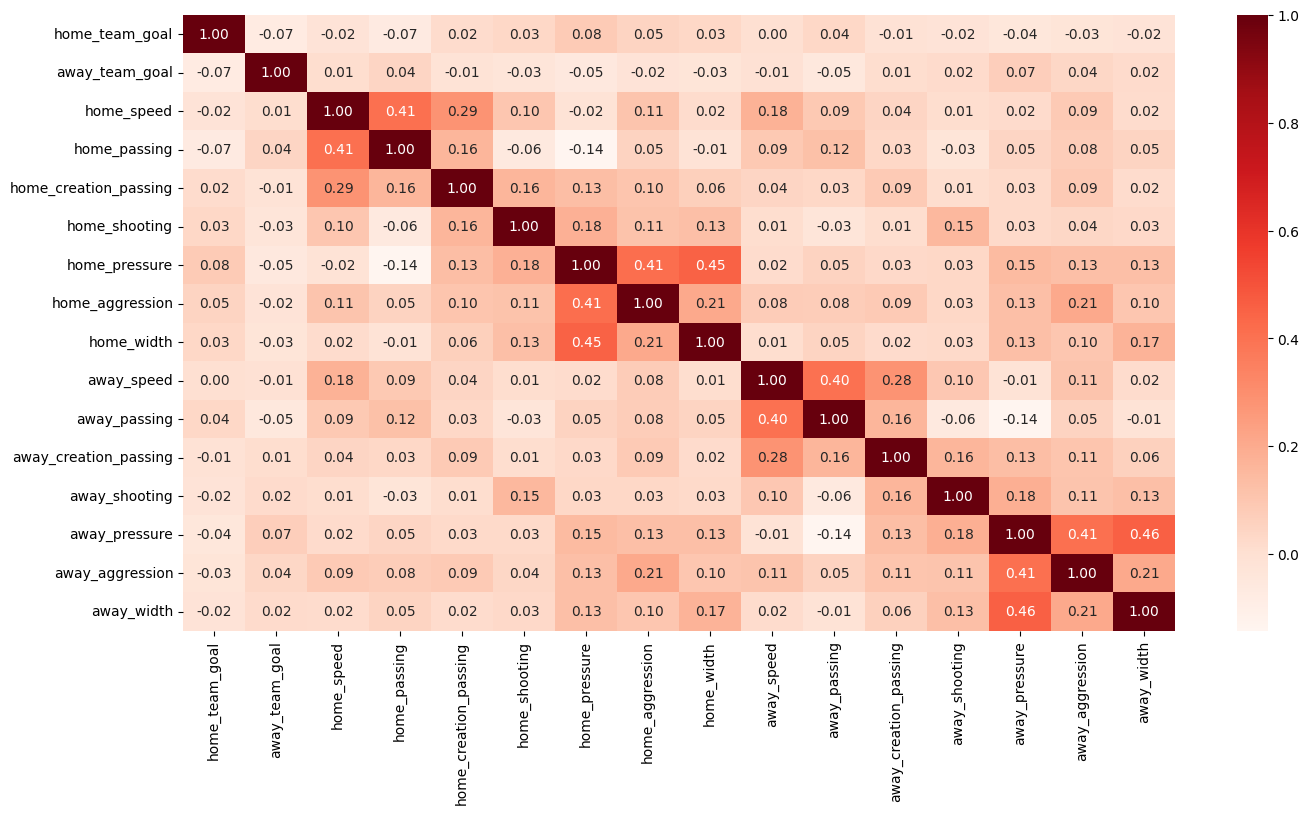

In [61]:
drop_columns_for_heatmap = ['id', 'date', 'season', 'league', 'country', 'home_team', 'away_team', 'result']

plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns=drop_columns_for_heatmap).corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()

### Histogram

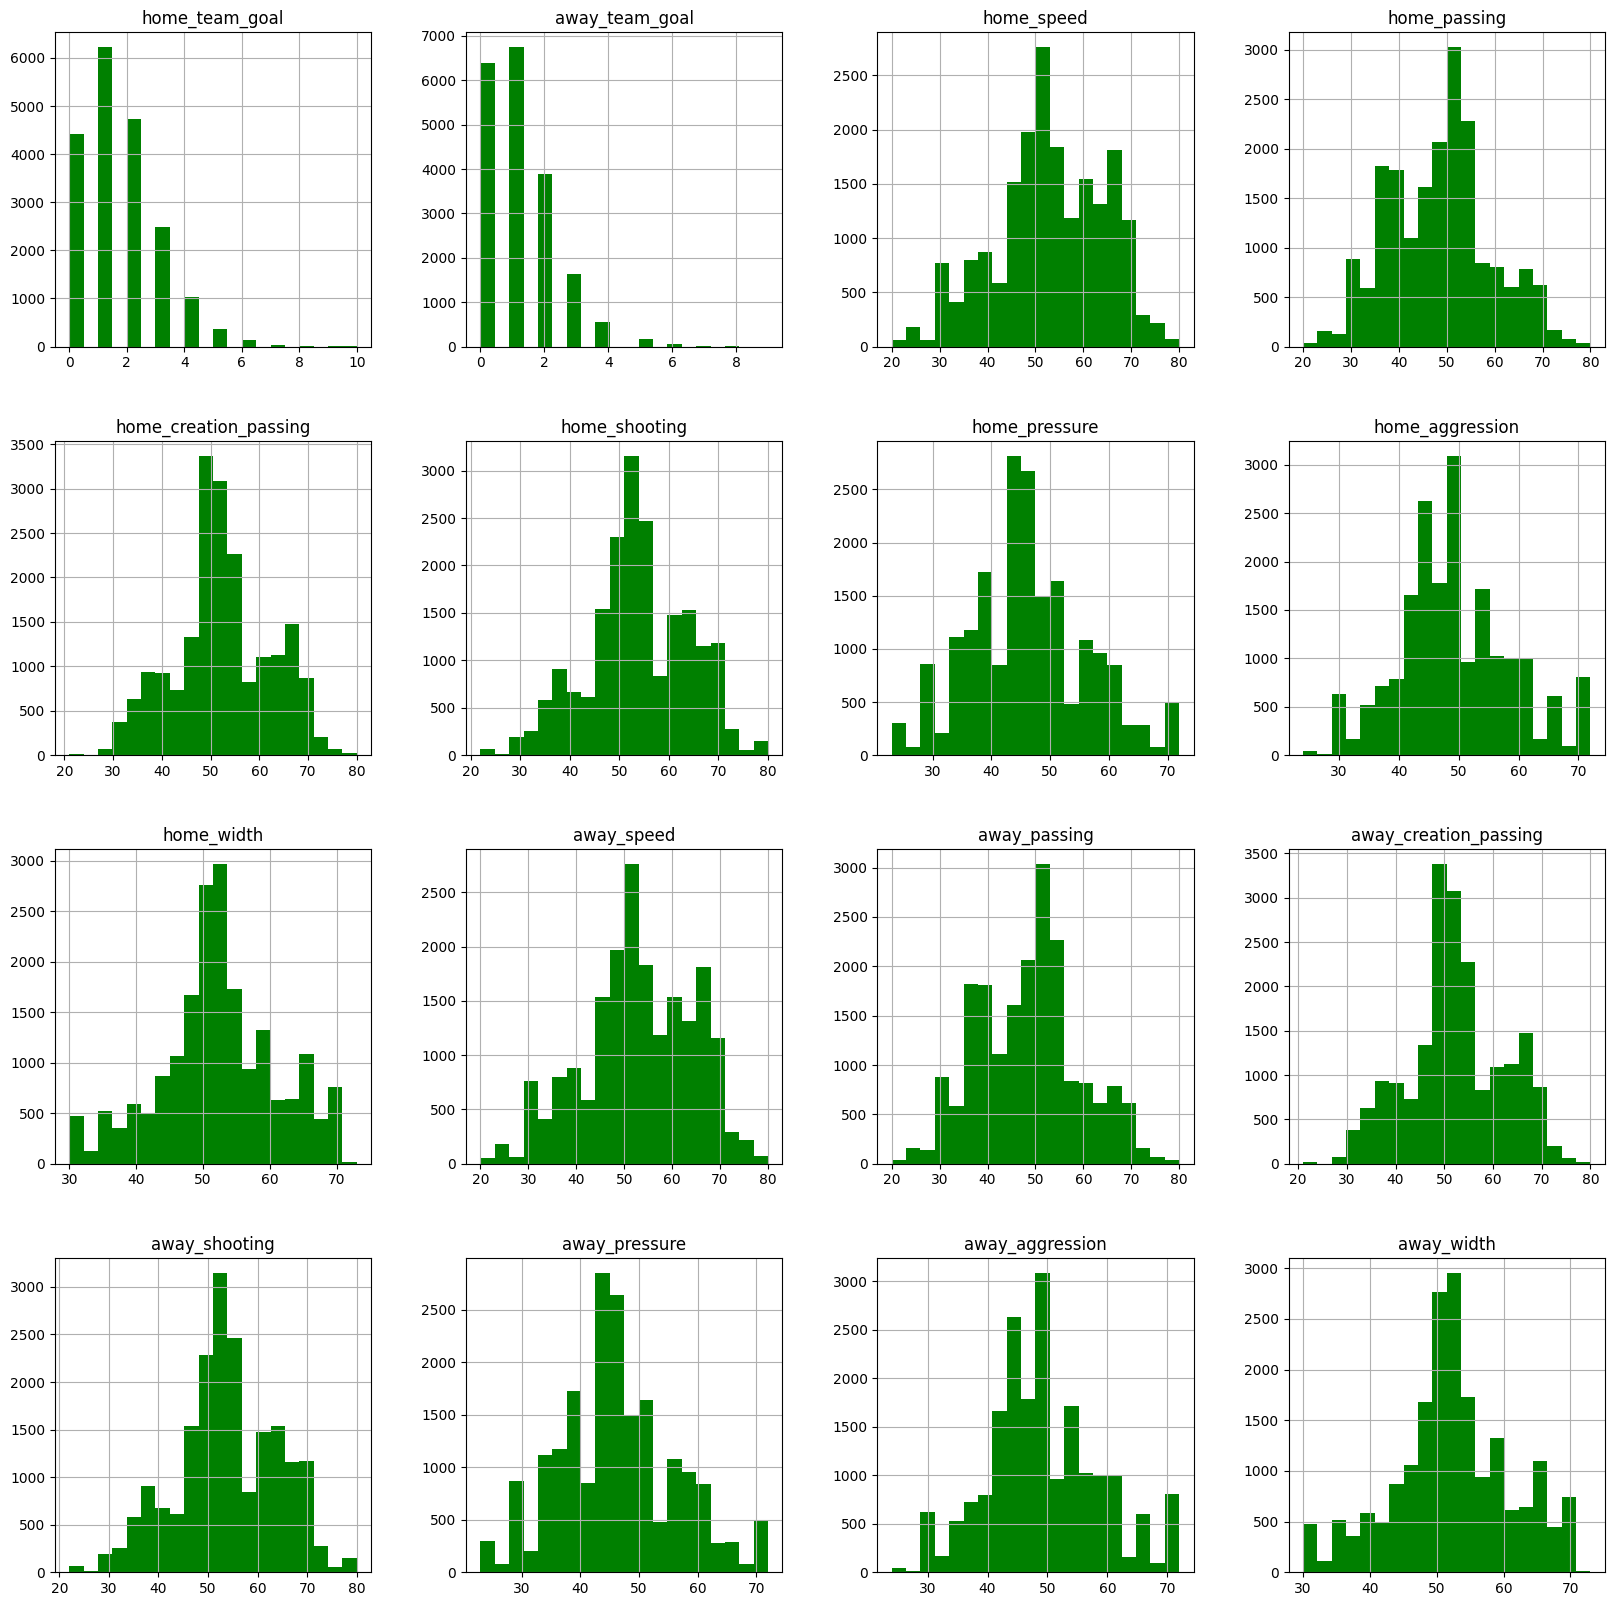

In [62]:
df.drop(columns='id').hist(bins=20, figsize=(20, 20), color='green')
plt.show()

# Filtering Data

In [63]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.head()

,id,date,season,league,country,home_team,away_team,home_team_goal,away_team_goal,home_speed,...,home_aggression,home_width,away_speed,away_passing,away_creation_passing,away_shooting,away_pressure,away_aggression,away_width,result
18362,24919,2010-07-17,2010/2011,Switzerland Super League,Switzerland,FC Thun,BSC Young Boys,1,1,52.592172,...,49.296086,52.327367,55.0,55.0,55.0,60.0,55.0,55.0,60.0,draw
18361,24918,2010-07-17,2010/2011,Switzerland Super League,Switzerland,Grasshopper Club Zürich,Neuchâtel Xamax,1,1,30.000000,...,60.000000,60.000000,60.0,45.0,60.0,60.0,50.0,45.0,55.0,draw
18364,24921,2010-07-18,2010/2011,Switzerland Super League,Switzerland,FC Luzern,FC St. Gallen,4,0,45.000000,...,45.000000,50.000000,35.0,60.0,35.0,55.0,50.0,55.0,50.0,win
18363,24920,2010-07-18,2010/2011,Switzerland Super League,Switzerland,AC Bellinzona,FC Sion,0,2,40.000000,...,50.000000,55.000000,35.0,60.0,50.0,60.0,35.0,40.0,45.0,loss
18365,24922,2010-07-20,2010/2011,Switzerland Super League,Switzerland,FC Basel,FC Zürich,3,2,40.000000,...,60.000000,60.000000,45.0,60.0,45.0,50.0,50.0,55.0,50.0,win


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19423 entries, 18362 to 19391
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     19423 non-null  int64         
 1   date                   19423 non-null  datetime64[ns]
 2   season                 19423 non-null  object        
 3   league                 19423 non-null  object        
 4   country                19423 non-null  object        
 5   home_team              19423 non-null  object        
 6   away_team              19423 non-null  object        
 7   home_team_goal         19423 non-null  int64         
 8   away_team_goal         19423 non-null  int64         
 9   home_speed             19423 non-null  float64       
 10  home_passing           19423 non-null  float64       
 11  home_creation_passing  19423 non-null  float64       
 12  home_shooting          19423 non-null  float64       
 13  ho